<a href="https://colab.research.google.com/github/zaraprvz/Diabetes-Prediction-Capstone-Project/blob/main/Diabetes_Predication_Dataset_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Diabetes Predication dataset***
Diabetes Mellitus is a long-term medical illness marked by high blood glucose (sugar) levels. It comes from either the body not making enough insulin, the hormone that controls blood sugar, or the body's cells developing an immunity to insulin's effects.

There are some factors that influence diabetes such as :

**Age** : age is an important factor that contribute to diabetes as you get older your more risk to it because of reduced amount of activity or excercise and level of hormones .

**gender** : Gender plays a big role , many women who have history in gestational diabetes have a high risk of developing type 2 diabetes later.

**BMI** :
BMI is a weight-and-height-based indicator of body fat.An increased BMI is linked to an increased risk of type 2 diabetes.

**blood glucose level** :
The blood glucose level is the amount of glucose (sugar) in the blood at any particular time. Elevated blood glucose levels, especially when fasting or after eating carbs, can suggest poor glucose management and raise the risk of developing diabetes.

**HbA1c Level**: Glycated hemoglobin, or HbA1c, is a test that indicates the average blood glucose level during the previous two to three months. It offers details on long-term blood sugar regulation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/kaggle (7).json"

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 65.9MB/s]


In [ ]:
!unzip \*.zip && rm *.zip


Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## **Exploratory Data Anaylsis **

In [ ]:
#number of rows and columns
print(df.shape)

(100000, 9)


In [ ]:
#number of null/missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [ ]:
#basic information
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#count null/missing values
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


It shows no missing values

In [ ]:
# check duplicate values
print(df.duplicated().sum())

3854


In [ ]:
# remove duplicate values
df = df.drop_duplicates()
print(df.duplicated().sum())

0


## **Visualize data**

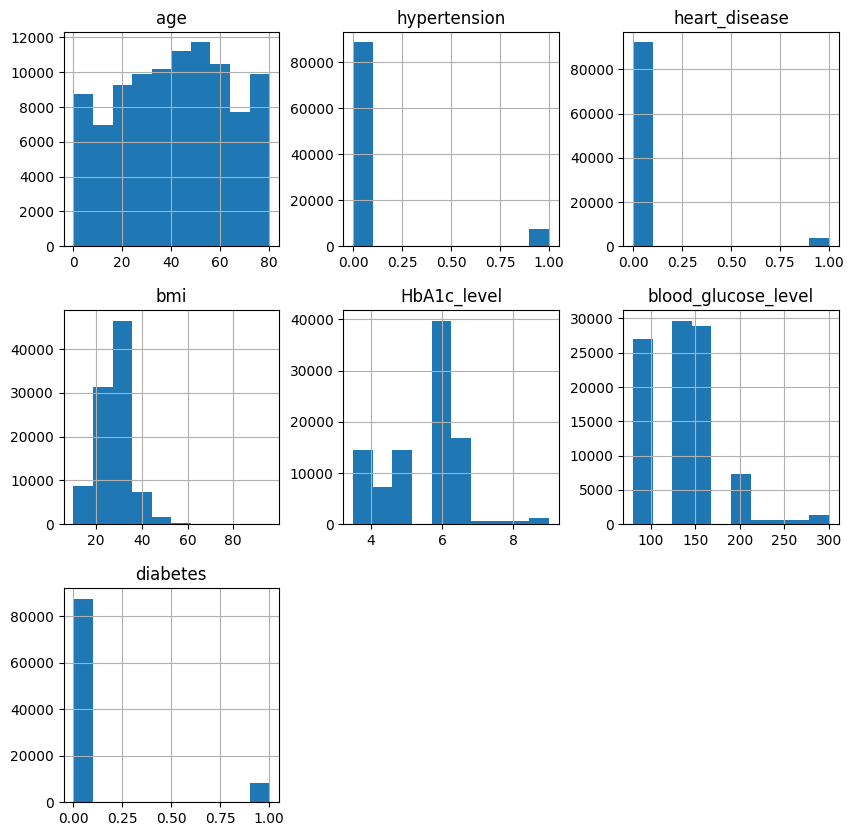

In [ ]:
#visualize data
df.hist(figsize = (10, 10))
plt.show()

## **BOXPLOT**

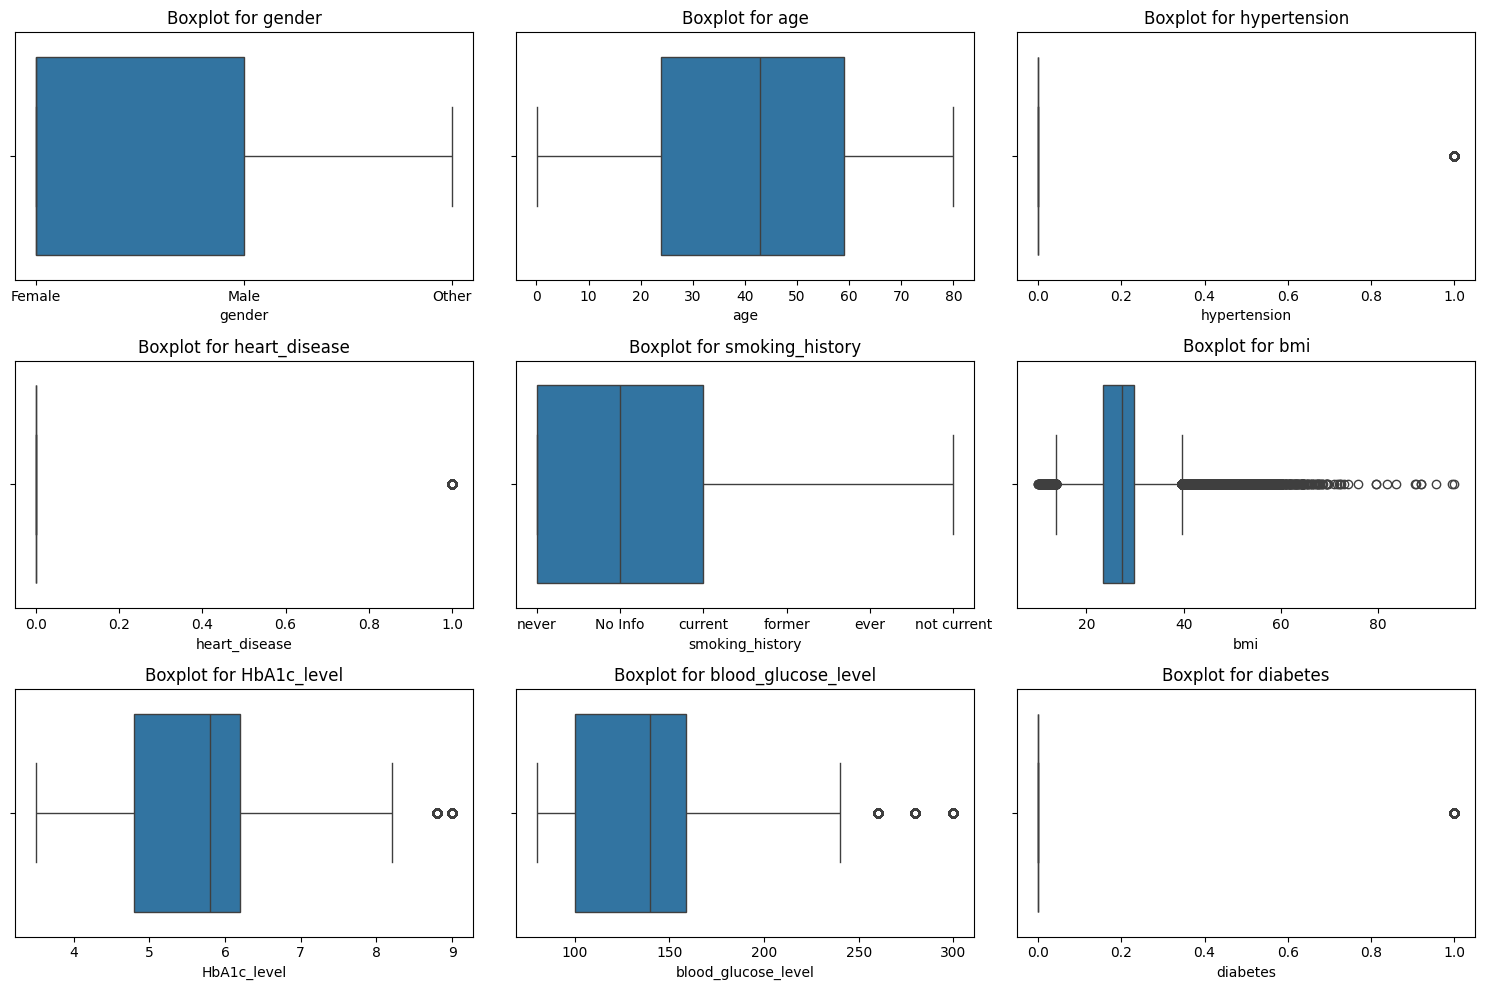

In [ ]:
#Boxplot
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## **Correlations**

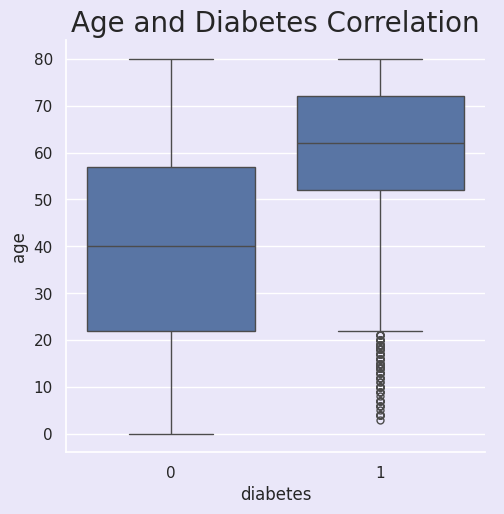

In [ ]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="diabetes",y="age", data=df, kind='box')
plt.title("Age and Diabetes Correlation", size=20, y=1.0);

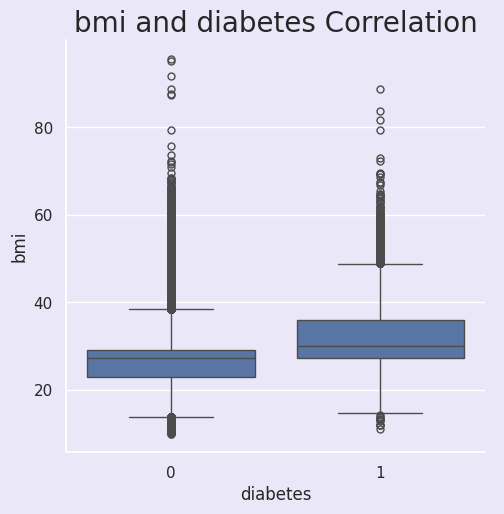

In [ ]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="diabetes",y="bmi", data=df, kind='box')
plt.title("bmi and diabetes Correlation", size=20, y=1.0);

## **Correlation Heatmap**

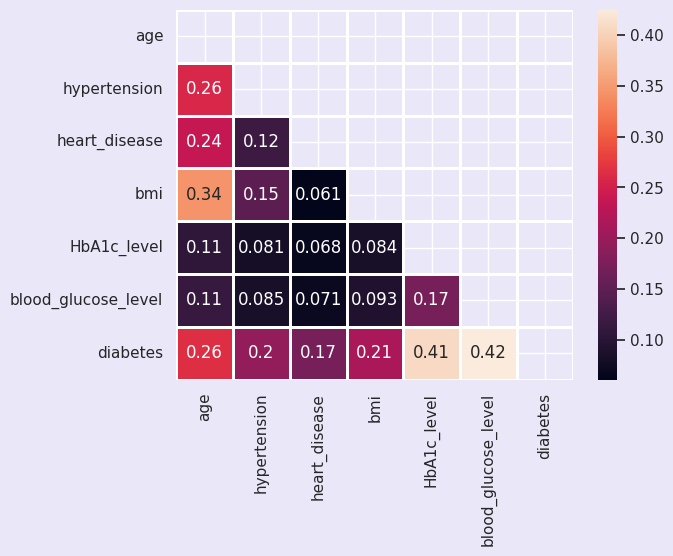

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
matrix = np.triu(df[numeric_columns].corr())
sns.heatmap(df[numeric_columns].corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

In [ ]:
# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

#Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

## **Preprocessing Steps**

1.Use ColumnTransformer to apply various preprocessing techniques to both categorical and numeric columns.

2.OneHotEncoder = is used to convert categorical variables into a format suitable for the model.

3.Pipeline = The pipeline ensures that the same preprocessing steps are applied to the training and test data.



In [ ]:
# Define column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['smoking_history']),
        ('gender', OneHotEncoder(drop='if_binary'), ['gender'])
    ],
        remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


# ***Machine Learning Models***

## 1) **Logistic Regression**


A method of statistics called logistic regression is applied to binary classification problems, in which there are two possible outcomes for the categorical outcome variable (e.g., yes/no, success/failure). Although it's a kind of regression analysis, it's applied to categorical dependent variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9570982839313572
Confusion Matrix:
[[17325   184]
 [  641  1080]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



Accuracy: 95.94%


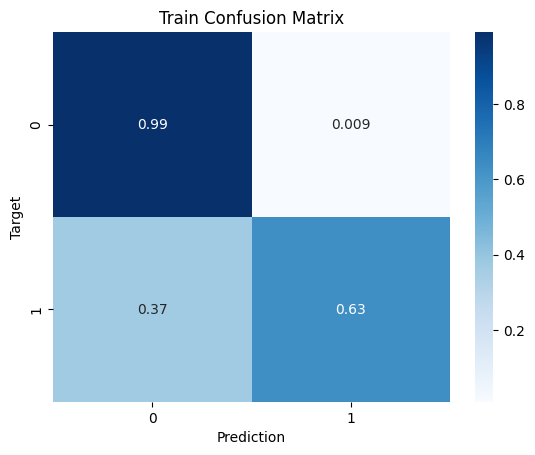

Accuracy: 95.71%


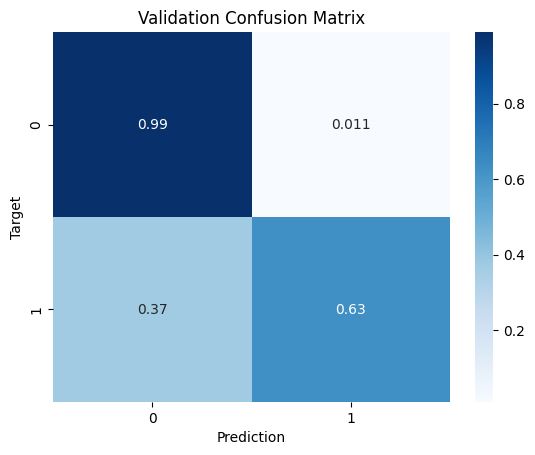

In [ ]:
# Function to predict and plot confusion matrix
def predict_and_plot(model, inputs, targets, name=''):
    predictions = model.predict(inputs)
    accuracy = accuracy_score(targets, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, predictions, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()

    return predictions

# Predict and plot on the training data
train_preds = predict_and_plot(pipeline, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(pipeline, X_test, y_test, 'Validation')

**Logistic Regression Model Evalution  :**

 With training accuracy at 95.94% and validation accuracy at 95.71%, it indicates that the model is learning effectively from the training data and generalizing well to unseen data.

Training Accuracy - 95.94%

Validation Accuracy - 95.71%

## 2)**Random Forest Classifer**

RandomForestClassifier is a common and powerful method for classification jobs. GridSearchCV is used to tune the model's hyperparameters, which does an exhaustive search over the parameter values supplied for the estimator. Cross-validation determines which model performs best.

In [ ]:
#Random Forest Model
model = RandomForestClassifier(n_estimators = 100 , random_state=42)

#Create a pipeline that includes the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['smoking_history']),
                                                 ('gender',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Accuracy: 99.93%


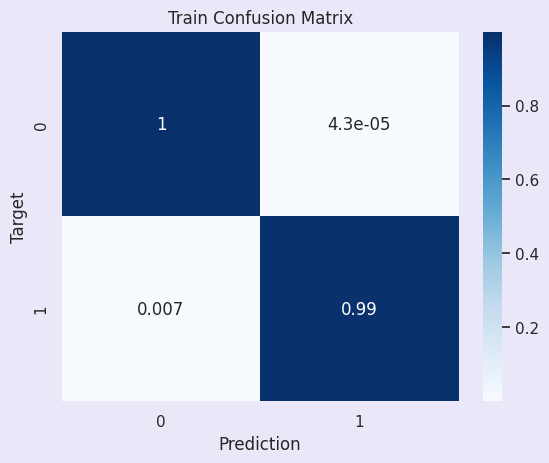

Accuracy: 96.80%


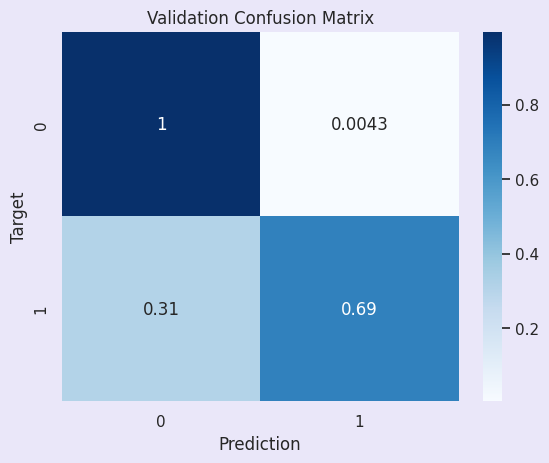

In [ ]:
# Function to predict and plot confusion matrix
def predict_and_plot(model, inputs, targets, name=''):
    predictions = model.predict(inputs)
    accuracy = accuracy_score(targets, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, predictions, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()

    return predictions

# Predict and plot on the training data
train_preds = predict_and_plot(pipeline, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(pipeline, X_test, y_test, 'Validation')

**RandomForestClassifer Evaluation:**

High Training Accuracy and high Validation accuracy indicates a well-performing model. However, further tuning might still help to slightly improve performance or reduce model complexity.

Training Accuracy - 99.93%

Validation Accuracy - 97.00%



## 3)**Decision Tree**

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It is a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', decision_tree_model)])
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9492979719188768
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230

Confusion Matrix:
 [[16982   527]
 [  448  1273]]


In [ ]:
#training and validation Accuracy
train_accuracy = pipeline.score(X_train, y_train)
val_accuracy = pipeline.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9993499401944979
Validation Accuracy: 0.9492979719188768


**Decision Tree Model: Before Tunning**

Training Accuracy - 99.93%

Validation Accuracy - 94.90%

The training accuracy is extraordinarily high (99.93%), indicating that the model matches the training data exceptionally well.The validation accuracy, while still good at 94.90%, is significantly lower than the training accuracy.The substantial difference between training and validation accuracy indicates that the model might be overfitting.

### **Hyperparameter Tuning Of Decision Tree**

In [ ]:
#Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a pipeline that includes the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', decision_tree)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Train the model with the best parameters
best_model = grid_search.best_estimator_

#Train the best model
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.9716183888917781
Validation Accuracy: 0.9706708268330734


Decision Tree Model after Hyperparameter Tunning:

It has reduced overfitting compared to the initial model and improved the result.


Training Accuracy - 97.16%

Validation Accuracy - 97.07%



## 4)**KNeighborsClassifier Model**

In machine learning, the KNeighborsClassifier is a kind of instance-based learning or non-generalizing learning method. It belongs to the family of k-Nearest Neighbors (k-NN), which is employed in regression and classification applications.

Instance-Based Learning: k-NN bases its predictions on the complete dataset rather than creating an explicit mode.

In [ ]:
# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn)])
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.958294331773271
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.95     19230

Confusion Matrix:
 [[17371   138]
 [  664  1057]]


In [ ]:
#training and validation accuracy results
train_accuracy = pipeline.score(X_train, y_train)
val_accuracy = pipeline.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9680300587654064
Validation Accuracy: 0.958294331773271


**KNeighbour classifer before tunning:**

With a training accuracy of 96.80% and a validation accuracy of 95.83%, the model appears to be performing well , but there might still be room for improvement through hyperparameter tuning.

### **Hyperparameter Tuning of KNN**

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1 ,scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Train the model with the best paramaters
best_model = grid_search.best_estimator_

# Make predictions on the test set with the tuned model
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
val_accuracy = accuracy_score(y_test, y_pred_best)

#Print the training and validation accuracies
print("Training Accuracy with Best Hyperparameters:", train_accuracy)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)


Training Accuracy with Best Hyperparameters: 0.9646107441884654
Validation Accuracy with Best Hyperparameters: 0.9598023920956839


**After tunning the hyperparameters:**

With a training accuracy of 96.46% and a validation accuracy of 95.98% using the best hyperparameters, the model is performing impressively well.

## 5)**Gradient Boosting Classifer**

In machine learning, Gradient Boosting is a well-known boosting algorithm that is used for both classification and regression problems.In the ensemble learning method called "boosting," the model is trained one step at a time, and each new model tries to fix the mistakes made by the model before it.


In [ ]:
# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Create a pipeline that includes the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', gbc)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Model Classification Report:\n", classification_report(y_test, y_pred))
print("Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the training and validation accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Model Accuracy: 0.9709828393135725
Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230

Model Confusion Matrix:
 [[17493    16]
 [  542  1179]]
Training Accuracy: 0.9716183888917781
Validation Accuracy: 0.9706708268330734


**GBC Results:**

With a training accuracy of 97.16% and a validation accuracy of 97.07%, the model is performing exceptionally well.

### 6)**Support Vector Classifer**



In [ ]:
# Create a Support Vector Classifier
svc = SVC()

# Create a pipeline that includes the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', svc)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the training and validation accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Accuracy: 0.960894435777431
Training Accuracy: 0.9716183888917781
Validation Accuracy: 0.9706708268330734


Accuracy: 96.35%


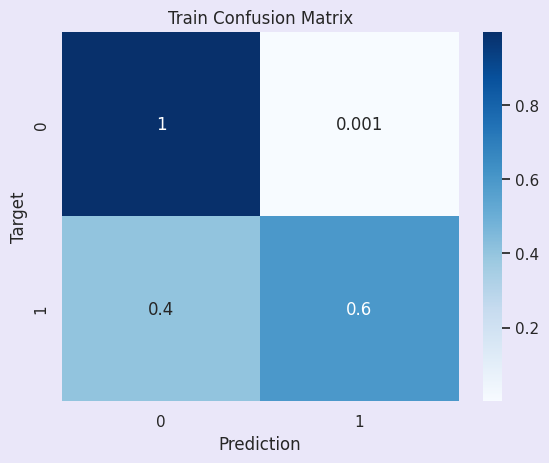

Accuracy: 96.09%


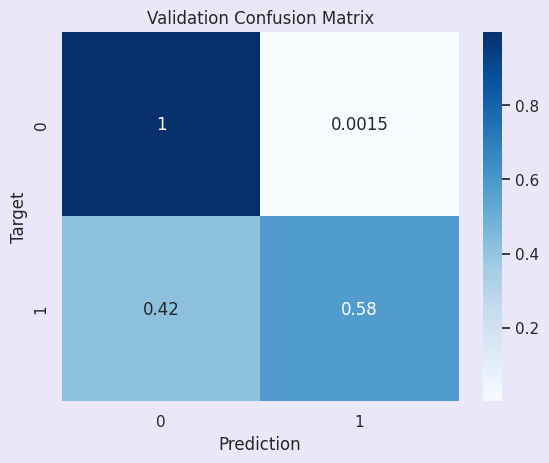

In [ ]:
# Function to predict and plot confusion matrix
def predict_and_plot(model, inputs, targets, name=''):
    predictions = model.predict(inputs)
    accuracy = accuracy_score(targets, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, predictions, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()

    return predictions

# Predict and plot on the training data
train_preds = predict_and_plot(pipeline, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(pipeline, X_test, y_test, 'Validation')

## **Conclusion:**
The best models for the dataset were logistic regression, decision tree after tuning the hyperparameters, gradient boosting classifier, and support vector classifier.

# ***Scale Your ML Prototype***

In [ ]:
#step 1: Install Necessary Libraries
!pip install dask[xgboost] dask[dataframe] dask-ml scikit-learn xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 8.8 MB/s eta 0:00:00


**Step 2: Load and Preprocess the Data**

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

**Step 3: Use Dask for Scalable Data Handling**

In [ ]:
import dask.dataframe as dd
import dask.array as da

# Convert the data to Dask DataFrames and Arrays
X_train_dask = da.from_array(X_train, chunks=(1000, X_train.shape[1]))
y_train_dask = da.from_array(y_train.values, chunks=(1000,))
X_test_dask = da.from_array(X_test, chunks=(1000, X_test.shape[1]))
y_test_dask = da.from_array(y_test.values, chunks=(1000,))

**Step 4: Train the Model with XGBoost**

In [ ]:
import dask
import xgboost as xgb
from dask.distributed import Client

# Set up the Dask client
client = Client()

# Convert Dask arrays to DaskDMatrix, which is required by XGBoost
dtrain = xgb.dask.DaskDMatrix(client, X_train_dask, y_train_dask)
dtest = xgb.dask.DaskDMatrix(client, X_test_dask, y_test_dask)

# Set up the model parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 1,
    'nthread': -1
}

# Train the model
output = xgb.dask.train(client, params, dtrain, num_boost_round=100)

# Get the trained model
bst = output['booster']

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40813
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36261'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42957'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42851', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42851
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:55242
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35119', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35119
INFO:distributed.core:Sta

**Step 5: Make Predictions and Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred_dask = xgb.dask.predict(client, bst, dtest)

# Compute accuracy
y_pred = y_pred_dask.compute()  # Get the result as a NumPy array
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

print("Validation Accuracy:", accuracy)

### **Trade-Offs and Implementation Decisions**
1) **Scalability**

Advantages: Dask allows for parallel processing and can handle datasets that are larger than memory.

Cons: Dask still requires a basic understanding of parallel computing techniques, despite being easier to set up than a full SageMaker system.

2)**Training Models:**

Advantages: Dask's connection with XGBoost enables effective training on big datasets using distributed computing.

Cons: Compared to single-node training, distributed training may be more difficult to administer and debug.

### **Conclusion**

This strategy guarantees that the machine learning prototype can expand to handle huge volumes of data efficiently by utilizing Dask and XGBoost within a Google Colab environment. Compared to employing a full-featured cloud service like SageMaker, this arrangement is easier to use and more affordable while still offering a reliable and scalable solution.


# ***Deployment Implementation***

Directory Structure
```
diabetes_prediction/
├── app/
│   ├── __init__.py
│   ├── main.py
│   ├── model.py
│   ├── logger.py
│   ├── templates/
│   │   └── index.html
├── requirements.txt
├── Dockerfile
├── docker-compose.yml
└── streamlit_app.py
```


**Step 1: Data Pipeline Implementation**

Data Storage and Transportation

AWS S3: Store data and models.

AWS Lambda: Load models and make predictions.

API Gateway: Route requests to AWS Lambda.

### Model Training and Saving to S3

In [ ]:
# model.py
!pip install boto3
import boto3

DATA_PATH = 'data/diabetes_prediction_dataset.csv'
MODEL_PATH = 'models/diabetes_model.pkl'

s3_client = boto3.client('s3')

def load_data():
    return pd.read_csv(DATA_PATH)

def save_model(model):
    dump(model, MODEL_PATH)
    s3_client.upload_file(MODEL_PATH, 'my-diabetes-model-bucket', 'diabetes_model.pkl')


    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='linear', random_state=42))
    ])

    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)
    save_model(pipeline)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.5 MB/s eta 0:00:00


### Prediction with Lambda Function

In [ ]:
# lambda_function.py
import boto3
from joblib import load
import pandas as pd
import json

s3_client = boto3.client('s3')

def load_model():
    s3_client.download_file('my-diabetes-model-bucket', 'diabetes_model.pkl', '/tmp/diabetes_model.pkl')
    return load('/tmp/diabetes_model.pkl')

def lambda_handler(event, context):
    model = load_model()
    input_data = pd.DataFrame(json.loads(event['body']))
    prediction = model.predict(input_data)
    return {
        'statusCode': 200,
        'body': json.dumps({'prediction': prediction.tolist()})
    }

### **Step 2: Logging**
Logging for Monitoring and Debugging

In [ ]:
# logger.py
import logging
import boto3
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Specify your desired AWS region here
AWS_REGION = 'us-east-1'
cloudwatch_client = boto3.client('logs', region_name=AWS_REGION)

def log_performance(metrics):
    logger.info(f"Performance metrics: {metrics}")

def log_error(error_message):
    logger.error(f"Error: {error_message}")
    cloudwatch_client.put_log_events(
        logGroupName='/aws/lambda/diabetes-prediction',
        logStreamName='errors',
        logEvents=[{
            'timestamp': int(round(time.time() * 1000)),
            'message': error_message
        }]
    )

### **Step 3: API and UI Design**
Flask API

In [ ]:
from flask import Flask, request, jsonify, render_template
from joblib import dump
import logging
import boto3
from joblib import load
import json

def load_data():
    return pd.read_csv(DATA_PATH)

def save_model(model):
    dump(model, MODEL_PATH)
    s3_client.upload_file(MODEL_PATH, 'my-diabetes-model-bucket', 'diabetes_model.pkl')

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/train', methods=['POST'])
def train():
    try:
        model.train_model()
        return jsonify({'message': 'Model trained successfully!'})
    except Exception as e:
        logger.log_error(str(e))
        return jsonify({'error': str(e)}), 500

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        input_data = pd.DataFrame(data)
        prediction = model.predict(input_data)
        logger.log_performance({'prediction': prediction.tolist()})
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        logger.log_error(str(e))
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


app/templates/index.html:

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Diabetes Prediction</title>
</head>
<body>
    <h1>Welcome to Diabetes Prediction</h1>
    <p>Use the API endpoint /predict to get predictions.</p>
</body>
</html>
```


### Dockerfile
```
# Dockerfile

FROM python:3.8-slim

WORKDIR /app

COPY requirements.txt requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

COPY . .

EXPOSE 5000

CMD ["python", "main.py"]
```

### docker-compose.yml
```
version: '3'

services:
  api:
    build: .
    ports:
      - "5000:5000"
```

### Streamlit UI

In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import requests

st.title("Diabetes Prediction")

def predict(data):
    response = requests.post('http://localhost:5000/predict', json=data)
    return response.json()

gender = st.selectbox('Gender', ['Male', 'Female'])
age = st.slider('Age', 0, 100)
# Add other inputs...

if st.button('Predict'):
    data = {'Gender': [gender], 'Age': [age]}  # Add other inputs...
    result = predict(data)
    st.write(f"Prediction: {result['prediction'][0]}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


2024-06-10 23:48:37.818 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-10 23:48:37.821 Session state does not function when running a script without `streamlit run`
